In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# avg_metrics = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/2022.09.19_19:12:42/people/avg.txt")
avg_metrics_1 = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/2022.09.19_20:49:35/people/avg.txt")
avg_metrics_2 = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/2022.09.19_20:50:59/people/avg.txt")
avg_metrics_3 = pd.read_csv("/home/david/Code/Uni/publicflow/metrics/2022.09.19_20:52:09/people/avg.txt")

In [31]:
def plot_metrics(metrics, from_ts, to_ts):
    metrics.set_index = metrics["ts"]
    metrics = metrics[from_ts:to_ts]

    fig,axs = plt.subplots(2,2,figsize=(12,8))

    # Number of Pods
    axs[0][0].plot(metrics["ts"].values, metrics["number_of_pods"].values, )
    # axs[0][0].set_title("Number of Pods")
    axs[0][0].set_xlabel("Time in Seconds")
    axs[0][0].set_ylabel("Average Number of Pods")

    # Time
    axs[0][1].stackplot(metrics["ts"].values, metrics[["time_in_station", "time_in_pods"]].T, labels=["Time in Station", "Time in Pods"])
    axs[0][1].legend(loc="upper left")
    # axs[0][1].set_title("Time in Stations vs Pods")
    axs[0][1].set_xlabel("Time in Seconds")
    axs[0][1].set_ylabel("Combined Average Time Spent")

    # Number of Pods
    axs[1][0].plot(metrics["ts"].values, metrics["meters_traveled"].values, )
    # axs[1][0].set_title("Meters Traveled")
    axs[1][0].set_xlabel("Time in Seconds")
    axs[1][0].set_ylabel("Average Meters Traveled")

# plt.show()

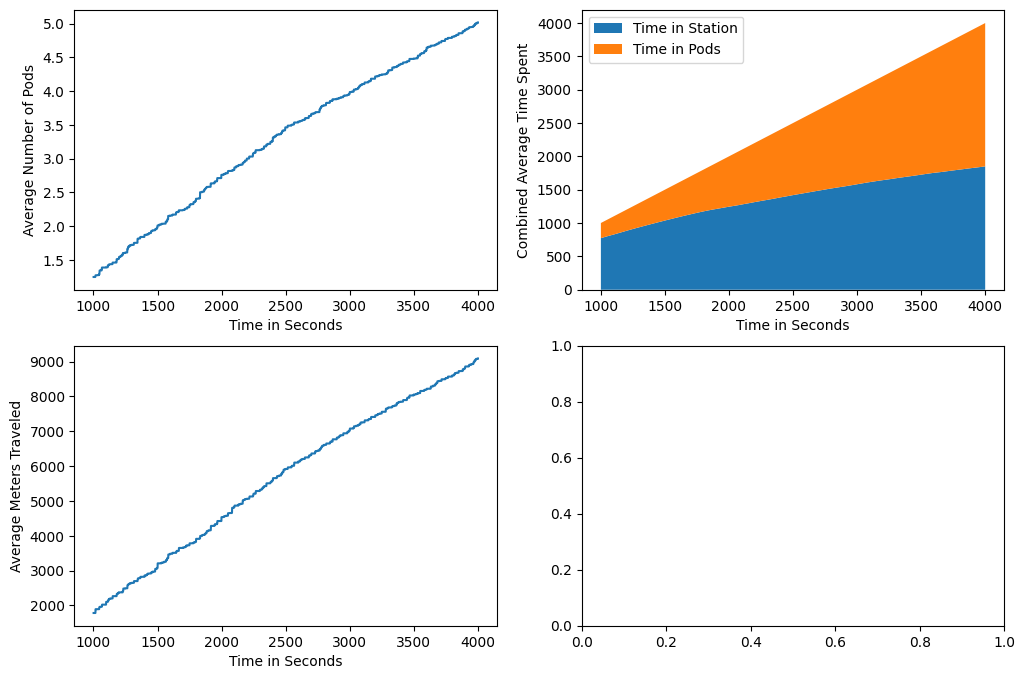

In [38]:
plot_metrics(avg_metrics_1,1000,4000)

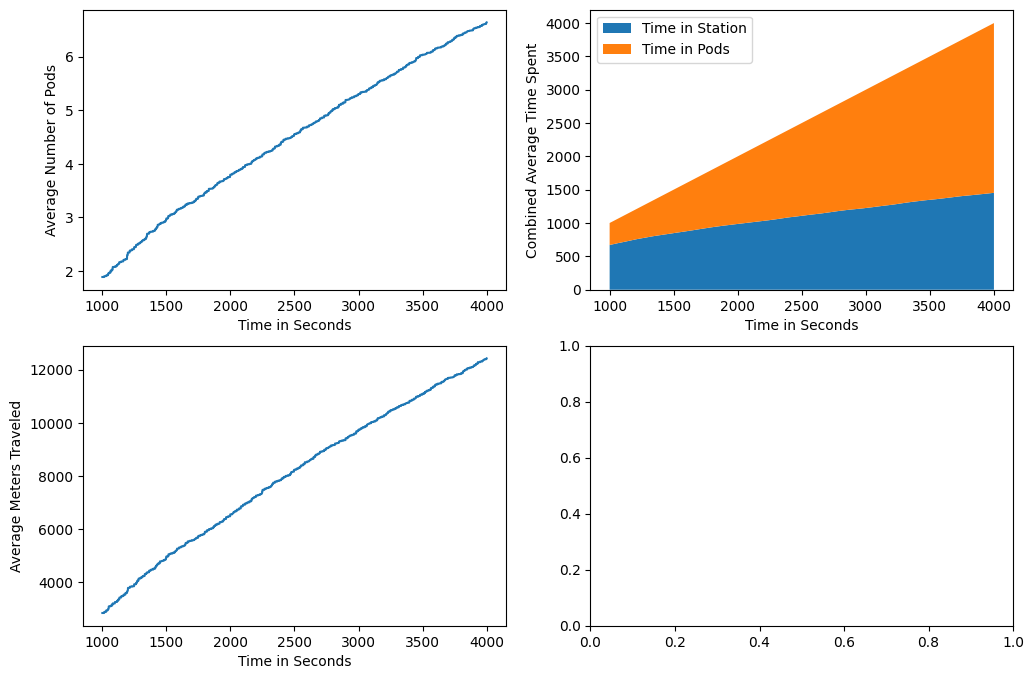

In [42]:
plot_metrics(avg_metrics_2,1000,4000)

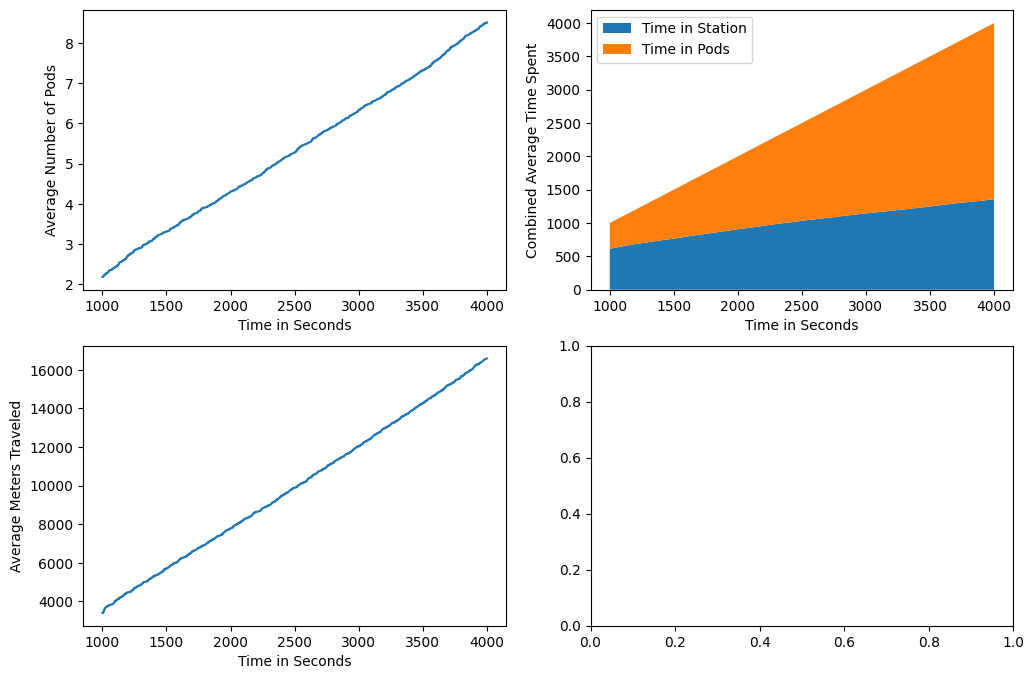

In [41]:
plot_metrics(avg_metrics_3,1000,4000)